# Actual surface albedo
- This script is used to visualize the actual surface albedo.
- Simulations: CNTL, ROOF_0.9, ROOF_DA

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator

In [2]:
file_path = '../atm_yearly/atm.csv'
df = pd.read_csv(file_path)

In [3]:
file_path2 = '../roof_energy/exported_hete_energy2.csv'
df2 = pd.read_csv(file_path2)
alpha2 = 1-(df2['Arr_FSA_U_2'] / df['Arr_FSDS_1'])
alpha_jja2 = 1-(df2['Arr_FSA_U_2_JJA'] / df['Arr_FSDS_1_JJA'])
alpha_djf2 = 1-(df2['Arr_FSA_U_2_DJF'] / df['Arr_FSDS_1_DJF'])

file_path1 = '../roof_energy/exported_hete_energy1.csv'
df1 = pd.read_csv(file_path1)
alpha1 = 1-(df1['Arr_FSA_U_1'] / df['Arr_FSDS_1'])
alpha_jja1 = 1-(df1['Arr_FSA_U_1_JJA'] / df['Arr_FSDS_1_JJA'])
alpha_djf1 = 1-(df1['Arr_FSA_U_1_DJF'] / df['Arr_FSDS_1_DJF'])

file_path0 = '../roof_energy/exported_hete_energy0.csv'
df0 = pd.read_csv(file_path0)
alpha0 = 1-(df0['Arr_FSA_U_0'] / df['Arr_FSDS_1'])
alpha_jja0 = 1-(df0['Arr_FSA_U_0_JJA'] / df['Arr_FSDS_1_JJA'])
alpha_djf0 = 1-(df0['Arr_FSA_U_0_DJF'] / df['Arr_FSDS_1_DJF'])

In [4]:
difference0 = alpha_djf0 - alpha_jja0
difference1 = alpha_djf1 - alpha_jja1 
difference2 = alpha_djf2 - alpha_jja2

In [6]:
def non_linear_model(x, a, b, c):
    return a * x**2 + b * x + c
x = np.arange(2015, 2100)    
params0, _ = curve_fit(non_linear_model, x, difference0)
non_linear_fit0 = non_linear_model(x, *params0)
params1, _ = curve_fit(non_linear_model, x, difference1)
non_linear_fit1 = non_linear_model(x, *params1)   
params2, _ = curve_fit(non_linear_model, x, difference2)
non_linear_fit2 = non_linear_model(x, *params2)

In [66]:
title = ['(a) Annual mean', '(b) DJF mean minus JJA mean']
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#1235b6'
lc9 = '#05101f'
lc10 = '#952cc6'
color = [lc1, lc3, lc7]
start_year = 2015
end_year = 2099
linewidth = 0.5
fontsize = 6
labelfont = 6
labelcolor = '#6b6b6b'
label = ['CNTL', 'ROOF_0.9', 'ROOF_DA']
padding = 4
pad = 1
xwidth = 0.75
length = 4
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2099]
ymin = [0.1, 0.006]
ymax = [0.5, 0.02]
alpha=0.075
handletextpad = 0.5
data = [[alpha0, alpha1, alpha2],
        [difference0, difference1, difference2]]
fit = [non_linear_fit0, non_linear_fit1, non_linear_fit2]

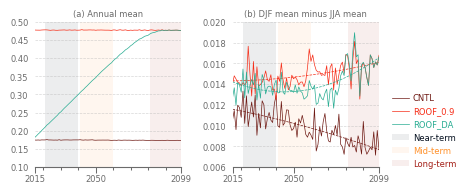

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4.5, 1.75))
ax = axes.flatten()
for i in range(2):
    for j in range(3):
        if i ==0:
            ax[i].plot(x, data[i][j], linewidth=linewidth, color= color[j], label = label[j])
        else:
            ax[i].plot(x, data[i][j], linewidth=linewidth, color= color[j], label = label[j])
            ax[i].plot(x, fit[j], linewidth=linewidth, color= color[j], label = label[j], linestyle='--')
    ax[i].set_title(title[i],fontsize=fontsize,color=labelcolor, pad = padding)  
    ax[i].set_xlim(start_year,end_year)
    ax[i].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor, labelsize=labelfont, pad=pad, color = labelcolor, width = xwidth)
    ax[i].tick_params(axis='x', which='major', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor, labelsize=labelfont, pad=pad, color = labelcolor, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='minor', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor, labelsize=labelfont, pad=pad, color = labelcolor, width = xwidth, length = length/2)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_color(labelcolor)
    ax[i].xaxis.set_minor_locator(minor_locator)
    ax[i].set_xticks(specific_years)
    ax[i].grid(True, which='major', axis='y',linestyle='--',linewidth=0.5, alpha=0.5)
    ax[i].set_ylim(ymin[i], ymax[i])
    ax[i].fill_betweenx([ymin[i], ymax[i]],2021, 2040, color=lc9, alpha=alpha, label='Near-term',edgecolor='none')
    ax[i].fill_betweenx([ymin[i], ymax[i]],2041, 2060, color=lc5, alpha=alpha, label='Mid-term',edgecolor='none')
    ax[i].fill_betweenx([ymin[i], ymax[i]],2081, 2100, color=lc2, alpha=alpha, label='Long-term',edgecolor='none')

#ax[0].annotate('Square of 2', xy=(2050, 0.3), xytext=(2060, 0.3),arrowprops=dict(facecolor=lc7, shrink=0.05))

lines, labels = ax[0].get_legend_handles_labels()
plt.subplots_adjust(left=0.055, right=0.82, bottom=0.1, top=0.93, wspace=0.35, hspace=0.55)
legend = fig.legend(lines, labels, bbox_to_anchor=(0.92, 0.05), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=labelfont, ncol=1)
lc = [lc1, lc3, lc7, lc9, lc5, lc2]
for i, text in enumerate(legend.get_texts()):
    text.set_color(lc[i])
        
plt.show()
fig.savefig('alpha.png', dpi=300)    

In [87]:
fig.savefig('alpha.pdf', dpi=600)

# Description

In [78]:
alpha2

0     0.181461
1     0.186015
2     0.191086
3     0.195368
4     0.200763
        ...   
80    0.476848
81    0.477086
82    0.476863
83    0.476321
84    0.476359
Length: 85, dtype: float64

In [104]:
print(alpha2[1] - alpha2[0])

0.004554528803113689


In [4]:
path = '/work/n02/n02/yuansun/cesm/'
# surface
sfile = path + 'cesm_inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c190214.nc'
ds_0 = xr.open_dataset(sfile)

mask = np.any(ds_0['PCT_URBAN'] != 0, axis=0)
mask = mask.rename({'lsmlat': 'lat', 'lsmlon': 'lon'})

In [95]:
urban =  ds_0['AREA'] * ds_0['LANDFRAC_PFT'] * ds_0['PCT_URBAN']
roof = urban * ds_0['WTLUNIT_ROOF']

In [102]:
print(roof.sum()/urban.sum())

<xarray.DataArray ()>
array(0.44334799)


In [89]:
print(difference0[0] - difference0[84])

0.0028562993761275246


In [90]:
print(alpha_jja0[0], alpha_jja0[84])

0.17229925297116844 0.1716611854984218


In [92]:
print(alpha_djf0[0]-alpha_djf0[84])

0.003494366848874164


In [5]:
ds_0

<xarray.Dataset>
Dimensions:                  (lsmlat: 192, lsmlon: 288, nlevsoi: 10,
                              natpft: 15, cft: 2, time: 12, lsmpft: 17,
                              numurbl: 3, numrad: 2, nlevurb: 5, nglcecp1: 11,
                              nglcec: 10)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, lsmpft, numurbl,
                                numrad, nlevurb, nglcecp1, nglcec
Data variables: (12/77)
    mxsoil_color             int32 ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float64 ...
    ORGANIC                  (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                     (lsmlat, lsmlon) float64 ...
    ...                       ...
    CONST_HARVEST_SH2        (lsmlat, lsmlon) float64 ...
    CONST_HARVEST_SH3        (lsmlat, lsmlon) float64 ...
    CONST_GRAZING            (lsmlat, lsmlon) float64 ...
    CONST_FERTNITRO_CFT      (cft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_PFT_LULCC  (natpft, lsmlat, lsmlon) float64 ...
    UNREPRESENTED_CFT_LULCC  (cft, lsmlat, lsmlon) float64 ...
Attributes: (12/48)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-14-19 10:18:15
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Soil_texture_raw_data_file_name:      mksrf_soitex.10level.c010119.nc
    Soil_color_raw_data_file_name:        mksrf_soilcolor_CMIP6_simyr2005.c17...
    Fmax_raw_data_file_name:              mksrf_fmax_3x3min_USGS_c120911.nc
    Organic_matter_raw_data_file_name:    mksrf_organic_10level_5x5min_ISRIC-...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...